# Compute KPI

This notebook compute the CO2 emission, the primary energy and CAPEX for different scenarios.

## Install the necessary library

In this part we install OSEM and the necessary python module.

In [1]:
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# when git repository public
# !pip install git+..

# currently
mydir = r'W:\Enerapi\code\OSEM'
if mydir not in sys.path:
    sys.path.append(mydir)
from osem.access_data import meteo, Kpi, Price
from osem.plot import plot_kpi

print('module loaded')

module loaded


## Compute future and present Co2 emissions

The proposed scenarios is to remplace oil boilers in the village of Champignac by 75% heat pumps and 25% gas boilers.

List of available colors for the plot: https://matplotlib.org/examples/color/named_colors.html

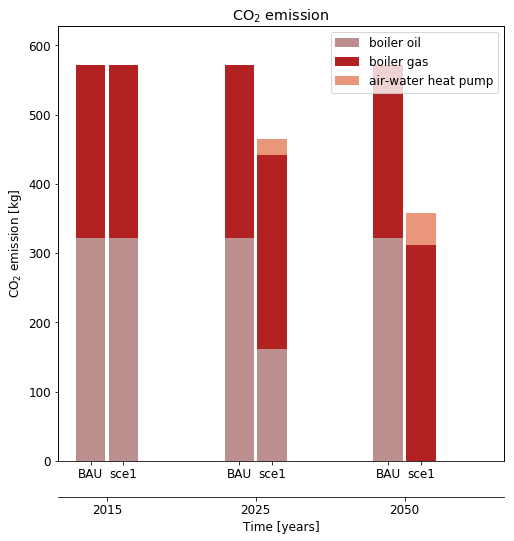

In [3]:
# create a pandas dataframe with the energy demand by heating agents
filename_energydemand = 'EnergyDemand_Champignac.xlsx'
plot_filename= 'myplot.png'
energy_demand = pd.read_excel(filename_energydemand)

# copmute the C02 emission and save this data in a .csv file.
mykpi = Kpi()
co2_emission = mykpi.get_co2_emission(energy_demand)
co2_emission.to_csv('co2_emission.txt')

# plot the data
width = 0.22
fontsize = 10
color = ['rosybrown', 'firebrick', 'darksalmon']
title_name = 'CO$_{2}$ emission'
xlabel = 'Time [years]'
plot_kpi.plot_c02(energy_demand, plot_filename, title_name=title_name, xlabel=xlabel, width=width, show=True, color=color)



## Compute future and present primary energy 

The proposed scenarios is to remplace oil boilers in the village of Champignac by 75% heat pumps and 25% gas boilers.

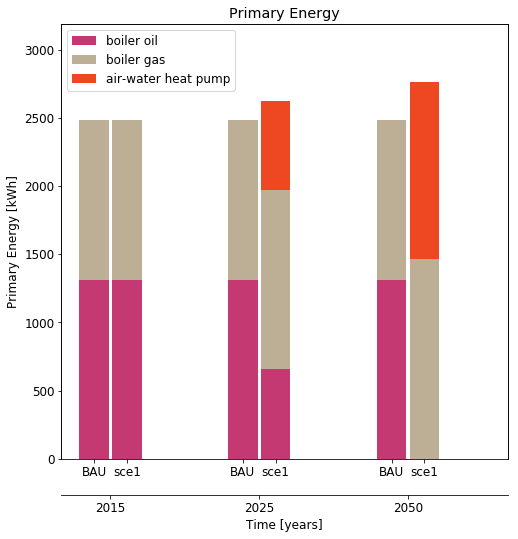

In [4]:
# plot the data
width = 0.22
fontsize = 10
title_name = 'Primary Energy'
xlabel = 'Time [years]'
plot_kpi.plot_primary_energy(energy_demand, plot_filename, title_name=title_name, xlabel=xlabel, width=width, show=True)

## Compute CAPEX

<img src="image/noun_Money_796384.png" alt="money" style="width: 150px;"/>  

We want to compute a first estimation of the investment price of the proposed scenario. Price in Spirouland are very similar to Swiss price. 

The proposed system is composed of:

* 7 heat pumps with a power of 200kW
* 3 gas boilers with a power of 150kW
* 40 meter of pipes with a diameter of 100 DN to deplace the warm water from the castle of Champignac to the village



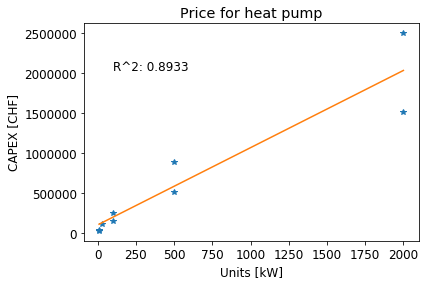

Estimated CAPEX is 2283166 CHF.


In [5]:
# get price for the different techno
myprice = Price()
price_hp = myprice.get_price('heat pump', 'CAPEX', unit_size=200, interp_choice=1)
price_boiler = myprice.get_price('gas boiler', 'CAPEX', unit_size=150, interp_choice=1)
price_pipe = myprice.get_price('pipe street', 'CAPEX', unit_size=100, interp_choice=1)

# check if linear interpolation is a good idea
myprice.create_fig_interpolation('heat pump', 'CAPEX', interp_choice=1, show=True)
# ref = myprice.get_reference_for_price('gas boiler','CAPEX')
# print(ref)

# Capex
capex = int(7* price_hp + 3 * price_boiler + 40* price_pipe)
print('Estimated CAPEX is ' + str(capex) +' CHF.')
